## Lead Scoring Case Study

#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 1: Importing and Exploring Data

In [3]:
#Importing dataset
lead_df = pd.read_csv("Leads.csv")

In [4]:
#Exploring the data set
lead_df=lead_df.replace({'Select': None})
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No            None    None   
1                        No            None    None   
2                        No  Potential Lead  Mumbai   
3                        No            None  Mumbai   
4                        No            None  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
#Checking the columns
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
#checking total number of row and columns
lead_df.shape

(9240, 37)

In [7]:
# let's look at the statistical aspects of the dataframe
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Step 2: Inspecting the Dataframe

In [8]:
#Checking for missing values and we can see that there are many missing values present in the data
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [9]:
# Replacing Select with None value as it can be treated as a missing value.
lead_df=lead_df.replace('Select', np.nan)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No            None    None   
1                        No            None    None   
2                        No  Potential Lead  Mumbai   
3                        No            None  Mumbai   
4                        No            None  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [10]:
#finding percentage of missing values in each column and dropping columns with missing value percentage > 40 %
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
lead_df = lead_df.drop(["How did you hear about X Education","Lead Profile","Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
pd.set_option("display.max.columns", None)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                     None                      Unemployed   
1   India                     None                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                     None                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No    None                                       No   
1                        No    None                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of 

In [13]:
#Checking unique categories in below mentioned columns and finding the percentage of each of the categories.
columns = ["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Tags","Update me on Supply Chain Content","Get updates on DM Content","City","I agree to pay the amount through cheque","A free copy of Mastering The Interview","Last Notable Activity"]
for i in columns:
    new_Df=(lead_df[i].value_counts()/sum(lead_df[i].value_counts()))*100
    print(new_Df)

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
NC_EDM                0.010865
WeLearn               0.010865
testone               0.010865
welearnblog_Home      0.010865
blog                  0.010865
Pay per Click Ads     0.010865
youtubechannel        0.010865
Name: Lead Source, dtype: float64
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
No     99.978355
Yes     0.

In [14]:
# Dropping columns with 90% of unique category
lead_df = lead_df.drop(["Lead Number","Do Not Email","Do Not Call","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)
lead_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
lead_df.shape

(9240, 16)

In [16]:
lead_df.isnull().sum()

Prospect ID                                  0
Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
What is your current occupation           2690
Through Recommendations                      0
Tags                                      3353
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [17]:
#Replacing missing values of below category columns with labels ending _NA.
cols = ["Country","Specialization","What is your current occupation","Tags","City","Last Activity"]
for i in cols:
    lead_df[i].fillna(i+"_NA", inplace = True)
pd.set_option("display.max.rows", None)
lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity     Country  \
0                   0.0  Page Visited on Website  Country_NA   
1                   2.5             Email Opened       India   
2                   2.0             Email Opened       India   
3                   1.0              Unreachable       India   
4                   1.0        Converted to Lead       India   

            Specialization What is your current occupation  \
0        Specialization_NA                      Unemployed   
1        Specialization_NA                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4        Specialization_NA                      Unemployed   

  Through Recommendations                                 Tags     City  \
0                      No          Interested in other courses  City_NA   
1                      No                              Ringing  City_NA   
2                      No  Will revert after reading the email   Mumbai   
3                      No                              Ringing   Mumbai   
4                      No  Will revert after reading the email   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [18]:
lead_df.isnull().sum()

Prospect ID                                 0
Lead Origin                                 0
Lead Source                                36
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Through Recommendations                     0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [19]:
lead_df["Lead Source"].fillna("Google", inplace = True) # Missing values has been replaced by mode of category Lead Source which is "Google"
lead_df["TotalVisits"].fillna(value=lead_df["TotalVisits"].mean(),inplace = True) #Missing values are replaced by mean
lead_df["Page Views Per Visit"].fillna(value=lead_df["Page Views Per Visit"].mean(),inplace = True) #Missing values are replaced by mean
lead_df.isnull().sum()

Prospect ID                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Through Recommendations                   0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [20]:
lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity     Country  \
0                   0.0  Page Visited on Website  Country_NA   
1                   2.5             Email Opened       India   
2                   2.0             Email Opened       India   
3                   1.0              Unreachable       India   
4                   1.0        Converted to Lead       India   

            Specialization What is your current occupation  \
0        Specialization_NA                      Unemployed   
1        Specialization_NA                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4        Specialization_NA                      Unemployed   

  Through Recommendations                                 Tags     City  \
0                      No          Interested in other courses  City_NA   
1                      No                              Ringing  City_NA   
2                      No  Will revert after reading the email   Mumbai   
3                      No                              Ringing   Mumbai   
4                      No  Will revert after reading the email   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

### Step 3: Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [21]:
# List of variables to map

varlist =  ['Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead_df
lead_df[varlist] = lead_df[varlist].apply(binary_map)
lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity     Country  \
0                   0.0  Page Visited on Website  Country_NA   
1                   2.5             Email Opened       India   
2                   2.0             Email Opened       India   
3                   1.0              Unreachable       India   
4                   1.0        Converted to Lead       India   

            Specialization What is your current occupation  \
0        Specialization_NA                      Unemployed   
1        Specialization_NA                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4        Specialization_NA                      Unemployed   

   Through Recommendations                                 Tags     City  \
0                        0          Interested in other courses  City_NA   
1                        0                              Ringing  City_NA   
2                        0  Will revert after reading the email   Mumbai   
3                        0                              Ringing   Mumbai   
4                        0  Will revert after reading the email   Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

### Dummy Variables

In [22]:
# Creating a dummy variable for all of the categorical variables and dropping the first one.
#'Country','City',
catvar=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Last Notable Activity']

# Adding the results to the master dataframe
#lead_df = pd.concat([lead_df, dummy1], axis=1)
#lead_df.head()

for i in catvar:
        temp = pd.get_dummies(lead_df[i])
        temp = pd.get_dummies(lead_df[i], drop_first = True)
        lead_df = pd.concat([lead_df, temp], axis = 1)
        lead_df.drop(i, axis = 1, inplace = True)
lead_df.head()

Prospect ID  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852          1          2.0   

   Total Time Spent on Website  Page Views Per Visit     Country  \
0                            0                   0.0  Country_NA   
1                          674                   2.5       India   
2                         1532                   2.0       India   
3                          305                   1.0       India   
4                         1428                   1.0       India   

   Through Recommendations     City  A free copy of Mastering The Interview  \
0                        0  City_NA                                       0   
1                        0  City_NA                                       0   
2                        0   Mumbai                                       1   
3                        0   Mumbai                                       0   
4                        0   Mumbai                                       0   

   Landing Page Submission  Lead Add Form  Lead Import  Quick Add Form  \
0                        0              0            0               0   
1                        0              0            0               0   
2                        1              0            0               0   
3                        1              0            0               0   
4                        1              0            0               0   

   Direct Traffic  Facebook  Google  Live Chat  NC_EDM  Olark Chat  \
0               0         0       0          0       0           1   
1               0         0       0          0       0           0   
2               1         0       0          0       0           0   
3               1         0       0          0       0           0   
4               0         0       1          0       0           0   

   Organic Search  Pay per Click Ads  Press_Release  Reference  \
0               0                  0              0          0   
1               1                  0              0          0   
2               0                  0              0          0   
3               0                  0              0          0   
4               0                  0              0          0   

   Referral Sites  Social Media  WeLearn  Welingak Website  bing  blog  \
0               0             0        0                 0     0     0   
1               0             0        0                 0     0     0   
2               0             0        0                 0     0     0   
3               0             0        0                 0     0     0   
4               0             0        0                 0     0     0   

   google  testone  welearnblog_Home  youtubechannel  Converted to Lead  \
0       0        0                 0               0                  0   
1       0        0                 0               0                  0   
2       0        0                 0               0                  0   
3       0        0                 0               0                  0   
4       0        0                 0               0                  1   

   Email Bounced  Email Link Clicked  Email Marked Spam  Email Opened  \
0              0                   0                  0             0   
1              0                   0                  0             1   
2              0                   0                  0             1   
3              0                   0                  0             0   
4              0                   0                  0             0   

   Email Received  Form Submitted on Website  Had a Phone Conversation  \
0               0                          0                         

### Step 4: Test-Train Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Putting feature variable to X
X = lead_df.drop(['Converted','Prospect ID','City','Country'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Landing Page Submission  Lead Add Form  Lead Import  Quick Add Form  \
0                        0              0            0               0   
1                        0              0            0               0   
2                        1              0            0               0   
3                        1              0            0               0   
4                        1              0            0               0   

   Direct Traffic  Facebook  Google  Live Chat  NC_EDM  Olark Chat  \
0               0         0       0          0       0           1   
1               0         0       0          0       0           0   
2               1         0       0          0       0           0   
3               1         0       0          0       0           0   
4               0         0       1          0       0           0   

   Organic Search  Pay per Click Ads  Press_Release  Reference  \
0               0                  0              0          0   
1               1                  0              0          0   
2               0                  0              0          0   
3               0                  0              0          0   
4               0                  0              0          0   

   Referral Sites  Social Media  WeLearn  Welingak Website  bing  blog  \
0               0             0        0                 0     0     0   
1               0             0        0                 0     0     0   
2               0             0        0                 0     0     0   
3               0             0        0                 0     0     0   
4               0             0        0                 0     0     0   

   google  testone  welearnblog_Home  youtubechannel  Converted to Lead  \
0       0        0                 0               0                  0   
1       0        0                 0               0                  0   
2       0        0                 0               0                  0   
3       0        0                 0               0                  0   
4       0        0                 0               0                  1   

   Email Bounced  Email Link Clicked  Email Marked Spam  Email Opened  \
0              0                   0                  0             0   
1              0                   0                  0             1   
2              0                   0                  0             1   
3              0                   0                  0             0   
4              0                   0                  0             0   

   Email Received  Form Submitted on Website  Had a Phone Conversation  \
0               0                          0                         0   
1               0                          0                         0   
2               0                          0                         0   
3               0                          0                         0   
4               0                          0                         0   

   Last Activity_NA  Olark Chat Conversation  Page Visited on Website  \
0                 0                        0       

In [25]:
# Putting response variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [26]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[ ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871    -0.657764                    -0.885371             -1.088305   
6795     0.099483                     0.005716             -0.473232   
3516     0.288795                    -0.691418              0.067847   
8105     0.288795                     1.365219              1.223999   
3934    -0.657764                    -0.885371             -1.088305   

      Through Recommendations  A free copy of Mastering The Interview  \
1871                        0                                       0   
6795                        0                                       1   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Landing Page Submission  Lead Add Form  Lead Import  Quick Add Form  \
1871                        0              0            0               0   
6795                        1              0            0               0   
3516                        0              0            0               0   
8105                        1              0            0               0   
3934                        0              0            0               0   

      Direct Traffic  Facebook  Google  Live Chat  NC_EDM  Olark Chat  \
1871               0         0       0          0       0           1   
6795               1         0       0          0       0           0   
3516               0         0       0          0       0           1   
8105               0         0       1          0       0           0   
3934               0         0       0          0       0           1   

      Organic Search  Pay per Click Ads  Press_Release  Reference  \
1871               0                  0              0          0   
6795               0                  0              0          0   
3516               0                  0              0          0   
8105               0                  0              0          0   
3934               0                  0              0          0   

      Referral Sites  Social Media  WeLearn  Welingak Website  bing  blog  \
1871               0             0        0                 0     0     0   
6795               0             0        0                 0     0     0   
3516               0             0        0                 0     0     0   
8105               0             0        0                 0     0     0   
3934               0             0        0                 0     0     0   

      google  testone  welearnblog_Home  youtubechannel  Converted to Lead  \
1871       0        0                 0               0                  0   
6795       0        0                 0               0                  0   
3516       0        0                 0               0                  0   
8105       0        0                 0               0                  0   
3934       0        0                 0               0                  0   

      Email Bounced  Email Link Clicked  Email Marked Spam  Email Opened  \
1871              0                   0                  0             1   
6795              0                   0                  0             1   
3516              0                   0                  0             1   
8105              0                   0                  0             0   
3934              0                   0                  0             1   

      Email Received  Form Submitted on Website  Had a Phone Conversation  \
1871               0                          0                         0   
6795               0                          0                         0   
3516               0                          0                         0   
8105               0                          0                         0   
3934               0                       

In [28]:
### Checking the converted Rate
converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
converted

38.53896103896104

### Step 6: Looking at Correlations

In [29]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

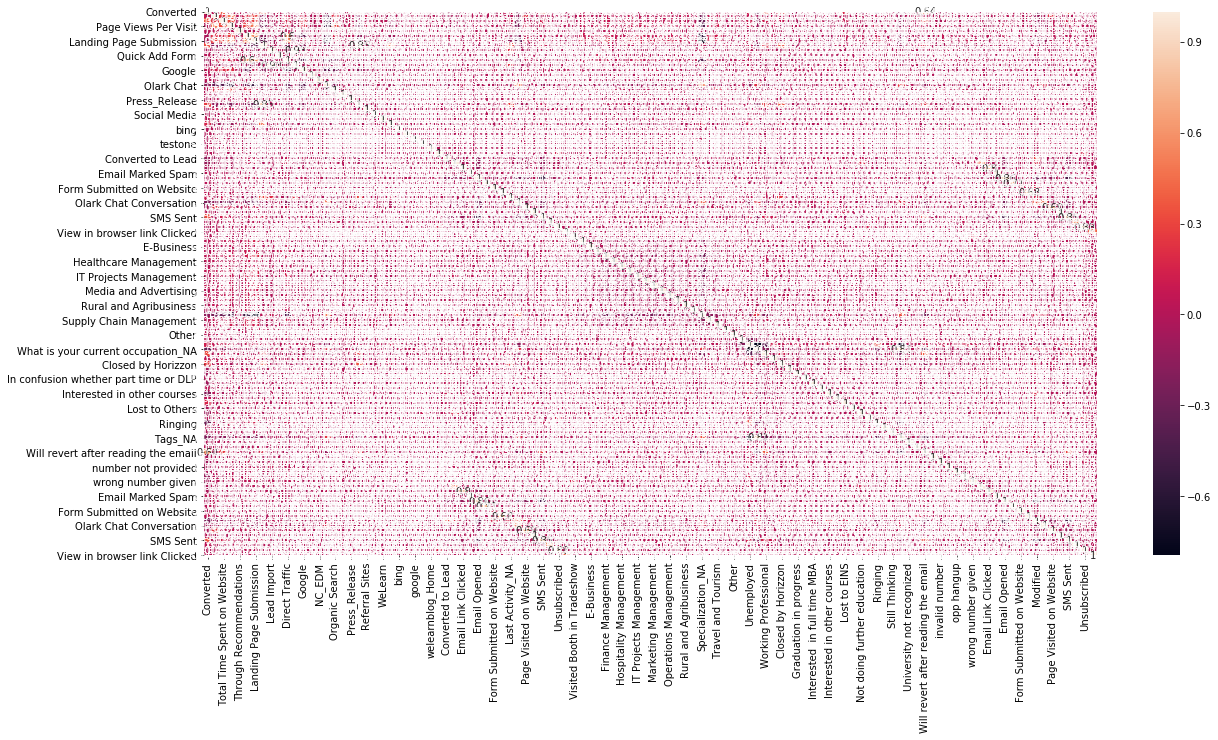

In [30]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

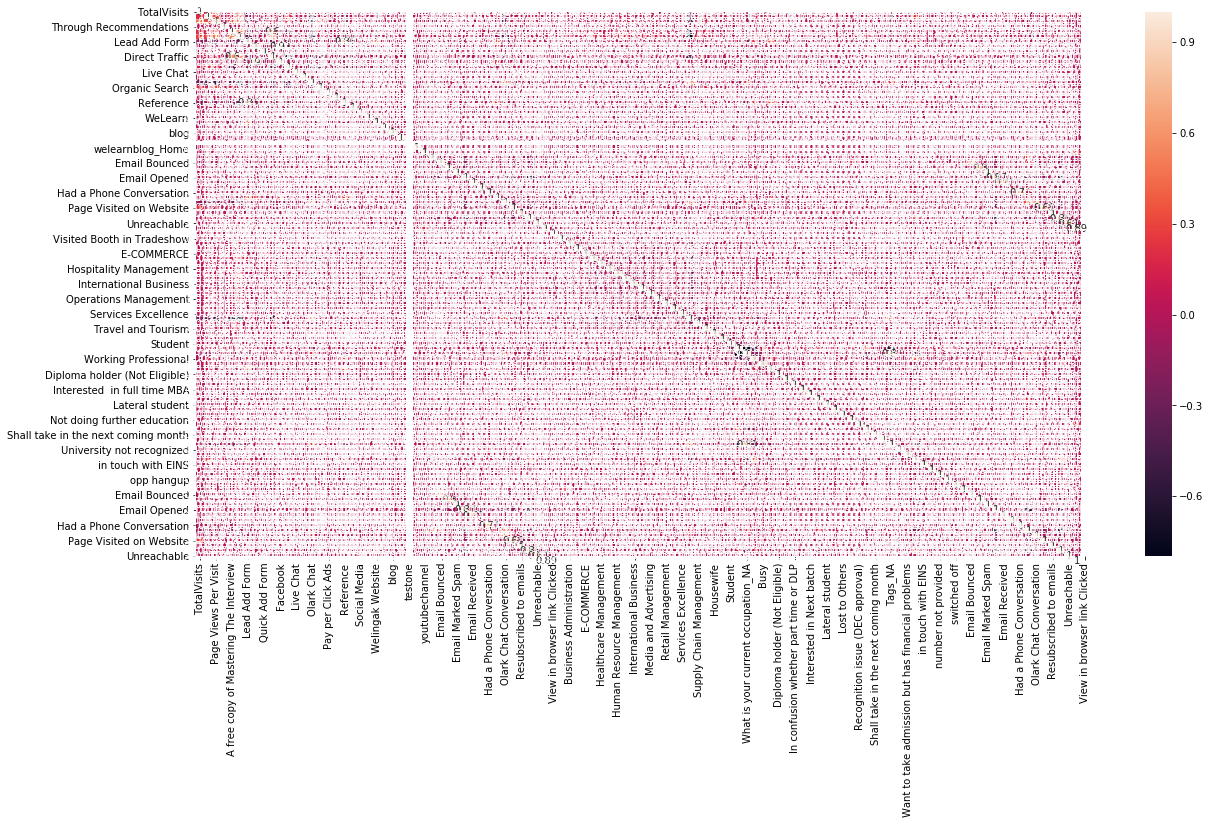

In [31]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [32]:
import statsmodels.api as sm

In [33]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                          106
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        23:38:04   Pearson chi2:                 2.52e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -1.019e+15    5.4e+07  -1.89e+07      0.000   -1.02e+15   -1.02e+15
TotalVisits                                        2.357e+13   9.97e+05   2.37e+07      0.000    2.36e+13    2.36e+13
Total Time Spent on Website                        1.374e+14   1.02e+06   1.34e+08      0.000    1.37e+14    1.37e+14
Page Views Per Visit                              -5.368e+12    1.2e+06  -4.46e+06      0.000   -5.37e+12   -5.37e+12
Through Recommendations                           -1.174e+14   2.56e+07  -4.59e+06      0.000   -1.17e+14   -1.17e+14
A free copy of Mastering The Interview             1.438e+13   2.68e+06   5.38e+06      0.000    1.44e+13    1.44e+13
Landing Page Submission                           -1.759e+14   3.41e+06  -5.15e+07      0.000   -1.76e+14   -1.76e+14
Lead Add Form                                      3.991e+14   1.31e+07   3.05e+07      0.000    3.99e+14    3.99e+14
Lead Import                                        1.152e+15   4.88e+07   2.36e+07      0.000    1.15e+15    1.15e+15
Quick Add Form                                       2.9e+15   6.79e+07   4.27e+07      0.000     2.9e+15     2.9e+15
Direct Traffic                                    -4.394e+14   4.27e+07  -1.03e+07      0.000   -4.39e+14   -4.39e+14
Facebook                                          -1.943e+15   6.47e+07     -3e+07      0.000   -1.94e+15   -1.94e+15
Google                                            -4.702e+14   4.26e+07   -1.1e+07      0.000    -4.7e+14    -4.7e+14
Live Chat                                          2.616e+15   6.26e+07   4.18e+07      0.000    2.62e+15    2.62e+15
NC_EDM                                             4.252e+15   7.96e+07   5.34e+07      0.000    4.25e+15    4.25e+15
Olark Chat                                        -3.576e+14   4.28e+07  -8.36e+06      0.000   -3.58e+14   -3.58e+14
Organic Search                                    -4.325e+14   4.27e+07  -1.01e+07      0.000   -4.33e+14   -4.33e+14
Pay per Click Ads                                 -2.116e+15   7.96e+07  -2.66e+07      0.000   -2.12e+15   -2.12e+15
Press_Release                                      -3.18e+15   6.42e+07  -4.96e+07      0.000   -3.18e+15   -3.18e+15
Reference                                         -9.185e+14   4.08e+07  -2.25e+07      0.000   -9.18e+14   -9.18e+14
Referral Sites                                    -4.526e+14   4.33e+07  -1.05e+07      0.000   -4.53e+14   -4.53e+14
Social Media                                      -1.582e+12    6.4e+07  -2.47e+04      0.000   -1.58e+12   -1.58e+12
WeLearn                                            2.323e+15   7.96e+07   2.92e+07      0.000    2.32e+15    2.32e+15
Welingak Websit

### Step 8: Feature Selection Using RFE

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [36]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 65),
 ('Total Time Spent on Website', False, 12),
 ('Page Views Per Visit', False, 81),
 ('Through Recommendations', False, 83),
 ('A free copy of Mastering The Interview', False, 47),
 ('Landing Page Submission', False, 34),
 ('Lead Add Form', False, 11),
 ('Lead Import', False, 41),
 ('Quick Add Form', False, 56),
 ('Direct Traffic', False, 19),
 ('Facebook', False, 18),
 ('Google', False, 21),
 ('Live Chat', False, 88),
 ('NC_EDM', False, 25),
 ('Olark Chat', False, 64),
 ('Organic Search', False, 20),
 ('Pay per Click Ads', False, 89),
 ('Press_Release', False, 73),
 ('Reference', False, 42),
 ('Referral Sites', False, 30),
 ('Social Media', False, 74),
 ('WeLearn', False, 86),
 ('Welingak Website', True, 1),
 ('bing', False, 92),
 ('blog', False, 51),
 ('google', False, 36),
 ('testone', False, 96),
 ('welearnblog_Home', False, 66),
 ('youtubechannel', False, 55),
 ('Converted to Lead', False, 28),
 ('Email Bounced', False, 10),
 ('Email Link Clicked', Fals

In [38]:
col = X_train.columns[rfe.support_]

In [39]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form', 'Direct Traffic', 'Facebook', 'Google', 'Live Chat',
       'NC_EDM', 'Olark Chat', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Reference', 'Referral Sites', 'Social Media',
       'WeLearn', 'bing', 'blog', 'google', 'testone', 'welearnblog_Home',
       'youtubechannel', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Email Marked Spam', 'Email Opened',
       'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Last Activity_NA',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked', 'Visited Booth in Tradeshow',
       'Business Administration', 'E-Business', 'E-COMM

##### Assessing the model with StatsModels

In [40]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.8
Date:                Mon, 02 Mar 2020   Deviance:                       2553.6
Time:                        23:38:06   Pearson chi2:                 1.50e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.2578      0.197    -16.538      0.000      -3.644      -2.872
Welingak Website                        2.7920      0.748      3.732      0.000       1.326       4.258
SMS Sent                                1.8210      0.221      8.252      0.000       1.388       2.253
SMS Sent                                0.5654      0.254      2.228      0.026       0.068       1.063
What is your current occupation_NA     -2.5189      0.144    -17.459      0.000      -2.802      -2.236
Busy                                    2.2157      0.290      7.647      0.000       1.648       2.784
Closed by Horizzon                      9.5760      1.024      9.350      0.000       7.569      11.583
Interested in Next batch               24.4375   3.55e+04      0.001      0.999   -6.96e+04    6.97e+04
Lateral student                        25.9042   4.41e+04      0.001      1.000   -8.64e+04    8.65e+04
Lost to EINS                            9.5312      0.768     12.417      0.000       8.027      11.036
Ringing                                -1.6226      0.293     -5.530      0.000      -2.198      -1.048
Tags_NA                                 3.6077      0.222     16.245      0.000       3.172       4.043
Will revert after reading the email     6.4822      0.247     26.223      0.000       5.998       6.967
invalid number                         -2.1697      1.042     -2.083      0.037      -4.212      -0.128
switched off                           -2.1027      0.553     -3.801      0.000      -3.187      -1.018
wrong number given                    -21.4437   1.29e+04     -0.002      0.999   -2.53e+04    2.53e+04
Modified                               -1.3118      0.149     -8.832      0.000      -1.603      -1.021
=======================================================================================================
"""

In [41]:
# Let's drop below columns since it has a high p value
col = col.drop(['Interested in Next batch','wrong number given','What is your current occupation_NA','Lateral student','SMS Sent'])
col

Index(['Welingak Website', 'Busy', 'Closed by Horizzon', 'Lost to EINS',
       'Ringing', 'Tags_NA', 'Will revert after reading the email',
       'invalid number', 'switched off', 'Modified'],
      dtype='object')

In [42]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1693.7
Date:                Mon, 02 Mar 2020   Deviance:                       3387.4
Time:                        23:38:07   Pearson chi2:                 7.61e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.6139      0.167    -15.670      0.000      -2.941      -2.287
Welingak Website                        4.7683      0.729      6.539      0.000       3.339       6.197
Busy                                    2.9796      0.250     11.925      0.000       2.490       3.469
Closed by Horizzon                      9.3743      1.019      9.201      0.000       7.377      11.371
Lost to EINS                            7.9595      0.738     10.786      0.000       6.513       9.406
Ringing                                -0.7032      0.263     -2.677      0.007      -1.218      -0.188
Tags_NA                                 1.9469      0.173     11.259      0.000       1.608       2.286
Will revert after reading the email     6.5503      0.227     28.901      0.000       6.106       6.994
invalid number                         -1.2042      1.024     -1.176      0.239      -3.211       0.802
switched off                           -0.9727      0.533     -1.825      0.068      -2.018       0.072
Modified                               -1.7047      0.109    -15.588      0.000      -1.919      -1.490
=======================================================================================================
"""

In [43]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:25]

1871    0.034989
6795    0.339166
3516    0.034989
8105    0.034989
3934    0.085358
4844    0.980855
3297    0.034989
8071    0.993668
987     0.085358
7423    0.980855
1032    0.339166
6542    0.339166
4317    0.980855
6472    0.980855
712     0.006550
3960    0.339166
4654    0.339166
5902    0.085358
4691    0.339166
4341    0.980855
3677    0.339166
1050    0.980855
9115    0.980855
2878    0.998843
6167    0.983718
dtype: float64

In [44]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:25]

array([0.0349889 , 0.33916622, 0.0349889 , 0.0349889 , 0.08535829,
       0.98085524, 0.0349889 , 0.99366774, 0.08535829, 0.98085524,
       0.33916622, 0.33916622, 0.98085524, 0.98085524, 0.00654966,
       0.33916622, 0.33916622, 0.08535829, 0.33916622, 0.98085524,
       0.33916622, 0.98085524, 0.98085524, 0.99884259, 0.98371797])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [45]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':np.round(y_train_pred,4), 'Lead Score': (np.round(y_train_pred,4))*100})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final

Converted  Converted_Prob  Lead Score  LeadID
0             0          0.0350        3.50    1871
1             0          0.3392       33.92    6795
2             0          0.0350        3.50    3516
3             0          0.0350        3.50    8105
4             0          0.0854        8.54    3934
5             1          0.9809       98.09    4844
6             0          0.0350        3.50    3297
7             1          0.9937       99.37    8071
8             0          0.0854        8.54     987
9             1          0.9809       98.09    7423
10            1          0.3392       33.92    1032
11            0          0.3392       33.92    6542
12            1          0.9809       98.09    4317
13            1          0.9809       98.09    6472
14            0          0.0065        0.65     712
15            0          0.3392       33.92    3960
16            0          0.3392       33.92    4654
17            0          0.0854        8.54    5902
18            0          0.3392       33.92    4691
19            1          0.9809       98.09    4341
20            1          0.3392       33.92    3677
21            1          0.9809       98.09    1050
22            1          0.9809       98.09    9115
23            1          0.9988       99.88    2878
24            1          0.9837       98.37    6167
25            1          0.9809       98.09    9031
26            0          0.3392       33.92    2175
27            1          0.9809       98.09    3147
28            1          0.9031       90.31    8886
29            0          0.0350        3.50    7944
30            1          0.9809       98.09    3278
31            0          0.0350        3.50    7615
32            1          0.3392       33.92    7455
33            0          0.0350        3.50    7379
34            1          0.9809       98.09    2712
35            0          0.0131        1.31     499
36            0          0.3392       33.92    8329
37            0          0.0854        8.54     504
38            0          0.9031       90.31    3610
39            0          0.0269        2.69    3975
40            0          0.0854        8.54    1835
41            0          0.3392       33.92    1756
42            0          0.0350        3.50    3059
43            0          0.0683        6.83    7257
44            0          0.3392       33.92     498
45            0          0.3392       33.92    6920
46            1          0.3392       33.92    4393
47            0          0.0131        1.31    6970
48            0          0.3392       33.92    6929
49            1          0.9988       99.88    4779
50            0          0.0683        6.83    6195
51            1          0.9809       98.09    5145
52            1          0.9809       98.09    5933
53            1          0.9809       98.09    9093
54            1          0.3392       33.92    4498
55            0          0.0683        6.83    4611
56            1          0.9809       98.09    2196
57            0          0.5904       59.04    1599
58            1          0.0854        8.54    9032
59            0          0.0854        8.54    5054
60            0          0.0854        8.54    8557
61            0          0.3392       33.92    6128
62            1          0.9809       98.09    3270
63            0          0.0854        8.54    5940
64            1          0.3392       33.92    6859
65            0          0.0854        8.54    2278
66            1          0.9809       98.09    4858
67            1          0.9809       98.09    2714
68            0          0.0131        1.31     561
69            1          0.9937       99.37     936
70            1          0.0854        8.54    3895
71            0          0.0350        3.50    8764
72            1          0.3392       33.92    4928
73            0          0.0131        1.31    8698
74            0          0.0683        6.83    7783
75            0          0.0854        8.54    4953
76

##### Creating new column 'predicted' with 1 if Coverted_Prob > 0.8 else 0

In [46]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head(25)

Converted  Converted_Prob  Lead Score  LeadID  Predicted
0           0          0.0350        3.50    1871          0
1           0          0.3392       33.92    6795          0
2           0          0.0350        3.50    3516          0
3           0          0.0350        3.50    8105          0
4           0          0.0854        8.54    3934          0
5           1          0.9809       98.09    4844          1
6           0          0.0350        3.50    3297          0
7           1          0.9937       99.37    8071          1
8           0          0.0854        8.54     987          0
9           1          0.9809       98.09    7423          1
10          1          0.3392       33.92    1032          0
11          0          0.3392       33.92    6542          0
12          1          0.9809       98.09    4317          1
13          1          0.9809       98.09    6472          1
14          0          0.0065        0.65     712          0
15          0          0.3392       33.92    3960          0
16          0          0.3392       33.92    4654          0
17          0          0.0854        8.54    5902          0
18          0          0.3392       33.92    4691          0
19          1          0.9809       98.09    4341          1
20          1          0.3392       33.92    3677          0
21          1          0.9809       98.09    1050          1
22          1          0.9809       98.09    9115          1
23          1          0.9988       99.88    2878          1
24          1          0.9837       98.37    6167          1

In [47]:
from sklearn import metrics

In [48]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3952   50]
 [ 654 1812]]


In [49]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.891156462585034


### Checking VIF's

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   Closed by Horizzon  1.07
0                     Welingak Website  1.03
3                         Lost to EINS  1.03
8                         switched off  1.01
1                                 Busy  1.00
7                       invalid number  1.00
6  Will revert after reading the email  0.11
4                              Ringing  0.09
9                             Modified  0.04
5                              Tags_NA  0.02

In [52]:
col = col.drop('Tags_NA', 1)
col

Index(['Welingak Website', 'Busy', 'Closed by Horizzon', 'Lost to EINS',
       'Ringing', 'Will revert after reading the email', 'invalid number',
       'switched off', 'Modified'],
      dtype='object')

In [53]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1791.3
Date:                Mon, 02 Mar 2020   Deviance:                       3582.6
Time:                        23:38:08   Pearson chi2:                 7.60e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.0004      0.053    -18.779      0.000      -1.105      -0.896
Welingak Website                        5.1537      0.730      7.058      0.000       3.722       6.585
Busy                                    1.3789      0.195      7.086      0.000       0.998       1.760
Closed by Horizzon                      7.8486      1.007      7.795      0.000       5.875       9.822
Lost to EINS                            6.4352      0.721      8.921      0.000       5.021       7.849
Ringing                                -2.3126      0.210    -11.016      0.000      -2.724      -1.901
Will revert after reading the email     4.9838      0.164     30.384      0.000       4.662       5.305
invalid number                         -2.8104      1.012     -2.778      0.005      -4.793      -0.828
switched off                           -2.5813      0.509     -5.069      0.000      -3.579      -1.583
Modified                               -1.8027      0.107    -16.772      0.000      -2.013      -1.592
=======================================================================================================
"""

In [54]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [55]:
y_train_pred[:25]

array([0.03512799, 0.26885639, 0.03512799, 0.03512799, 0.05715499,
       0.98171739, 0.03512799, 0.99360285, 0.05715499, 0.98171739,
       0.26885639, 0.26885639, 0.98171739, 0.98171739, 0.00596597,
       0.26885639, 0.26885639, 0.05715499, 0.26885639, 0.98171739,
       0.26885639, 0.98171739, 0.98171739, 0.99893975, 0.98453078])

In [56]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [57]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Score  LeadID  Predicted
0          0        0.035128        3.50    1871          0
1          0        0.268856       33.92    6795          0
2          0        0.035128        3.50    3516          0
3          0        0.035128        3.50    8105          0
4          0        0.057155        8.54    3934          0

In [58]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.891156462585034


In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                   Closed by Horizzon  1.05
3                         Lost to EINS  1.02
0                     Welingak Website  1.01
1                                 Busy  1.00
6                       invalid number  1.00
7                         switched off  1.00
5  Will revert after reading the email  0.11
4                              Ringing  0.09
8                             Modified  0.03

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [60]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3952,   50],
       [ 654, 1812]], dtype=int64)

In [61]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.891156462585034

## Confusion Matrix

In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7347931873479319

In [64]:
# Let us calculate specificity
TN / float(TN+FP)

0.9875062468765617

In [65]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01249375312343828


In [66]:
# positive predictive value 
print (TP / float(TP+FP))

0.9731471535982814


In [67]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8580112896222318


### Step 9: Plotting the ROC Curve

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

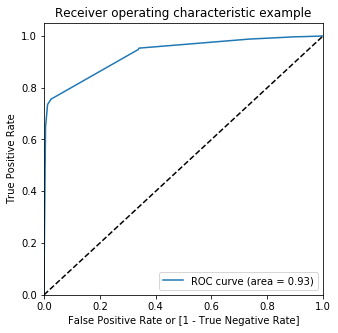

In [70]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [71]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Score  LeadID  Predicted  0.0  0.1  0.2  \
0          0        0.035128        3.50    1871          0    1    0    0   
1          0        0.268856       33.92    6795          0    1    1    1   
2          0        0.035128        3.50    3516          0    1    0    0   
3          0        0.035128        3.50    8105          0    1    0    0   
4          0        0.057155        8.54    3934          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.771490  0.952960  0.659670
0.2   0.2  0.771027  0.947689  0.662169
0.3   0.3  0.891466  0.755880  0.975012
0.4   0.4  0.891466  0.755880  0.975012
0.5   0.5  0.891466  0.755880  0.975012
0.6   0.6  0.891156  0.734793  0.987506
0.7   0.7  0.891156  0.734793  0.987506
0.8   0.8  0.891156  0.734793  0.987506
0.9   0.9  0.864409  0.653690  0.994253


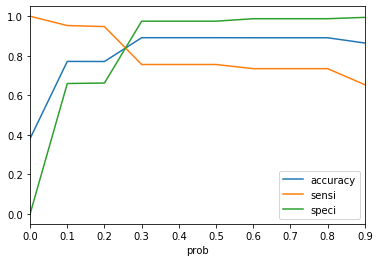

In [73]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(25)

Converted  Converted_Prob  Lead Score  LeadID  Predicted  0.0  0.1  0.2  \
0           0        0.035128        3.50    1871          0    1    0    0   
1           0        0.268856       33.92    6795          0    1    1    1   
2           0        0.035128        3.50    3516          0    1    0    0   
3           0        0.035128        3.50    8105          0    1    0    0   
4           0        0.057155        8.54    3934          0    1    0    0   
5           1        0.981717       98.09    4844          1    1    1    1   
6           0        0.035128        3.50    3297          0    1    0    0   
7           1        0.993603       99.37    8071          1    1    1    1   
8           0        0.057155        8.54     987          0    1    0    0   
9           1        0.981717       98.09    7423          1    1    1    1   
10          1        0.268856       33.92    1032          0    1    1    1   
11          0        0.268856       33.92    6542          0    1    1    1   
12          1        0.981717       98.09    4317          1    1    1    1   
13          1        0.981717       98.09    6472          1    1    1    1   
14          0        0.005966        0.65     712          0    1    0    0   
15          0        0.268856       33.92    3960          0    1    1    1   
16          0        0.268856       33.92    4654          0    1    1    1   
17          0        0.057155        8.54    5902          0    1    0    0   
18          0        0.268856       33.92    4691          0    1    1    1   
19          1        0.981717       98.09    4341          1    1    1    1   
20          1        0.268856       33.92    3677          0    1    1    1   
21          1        0.981717       98.09    1050          1    1    1    1   
22          1        0.981717       98.09    9115          1    1    1    1   
23          1        0.998940       99.88    2878          1    1    1    1   
24          1        0.984531       98.37    6167          1    1    1    1   

    0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0     0    0    0    0    0    0    0                0  
1     0    0    0    0    0    0    0                0  
2     0    0    0    0    0    0    0                0  
3     0    0    0    0    0    0    0                0  
4     0    0    0    0    0    0    0                0  
5     1    1    1    1    1    1    1                1  
6     0    0    0    0    0    0    0                0  
7     1    1    1    1    1    1    1                1  
8     0    0    0    0    0    0    0                0  
9     1    1    1    1    1    1    1                1  
10    0    0    0    0    0    0    0                0  
11    0    0    0    0    0    0    0                0  
12    1    1    1    1    1    1    1                1  
13    1    1    1    1    1    1    1                1  
14    0    0    0    0    0    0    0                0  
15    0    0    0    0    0    0    0                0  
16    0    0    0    0    0    0    0                0  
17    0    0    0    0    0    0    0                0  
18    0    0    0    0    0    0    0                0  
19    1    1    1    1    1    1    1                1  
20    0    0    0    0    0    0    0                0  
21    1    1    1    1    1    1    1                1  
22    1    1    1    1    1    1    1                1  
23    1    1    1    1    1    1    1                1  
24    1    1    1    1    1    1    1                1

In [75]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.891465677179963

In [76]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3902,  100],
       [ 602, 1864]], dtype=int64)

In [77]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7558799675587997

In [79]:
# Let us calculate specificity
TN / float(TN+FP)

0.9750124937531235

In [80]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.02498750624687656


In [81]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9490835030549898


In [82]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8663410301953819


### Precision and Recall 

In [83]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3952,   50],
       [ 654, 1812]], dtype=int64)

##### Precision
TP / TP + FP

In [84]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9731471535982814

##### Recall
TP / TP + FN

In [85]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7347931873479319

In [86]:
from sklearn.metrics import precision_score, recall_score

In [87]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9731471535982814

In [88]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7347931873479319

In [89]:
from sklearn.metrics import precision_recall_curve

In [90]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

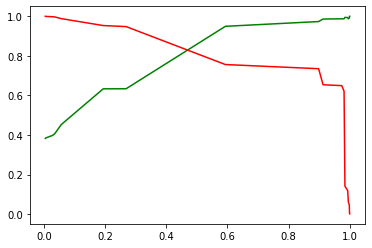

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [93]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [94]:
X_test = X_test[col]
X_test.head()

Welingak Website  Busy  Closed by Horizzon  Lost to EINS  Ringing  \
4269                 0     0                   0             0        0   
2376                 0     0                   0             0        0   
7766                 0     0                   0             0        0   
9199                 0     0                   0             0        0   
4359                 0     0                   0             0        0   

      Will revert after reading the email  invalid number  switched off  \
4269                                    0               0             0   
2376                                    1               0             0   
7766                                    1               0             0   
9199                                    0               0             0   
4359                                    1               0             0   

      Modified  
4269         0  
2376         0  
7766         0  
9199         1  
4359         0

In [95]:
X_test_sm = sm.add_constant(X_test)

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

4269    0.268856
2376    0.981717
7766    0.981717
9199    0.057155
4359    0.981717
9186    0.981717
1631    0.981717
8963    0.981717
8007    0.057155
5324    0.981717
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
# Let's see the head
y_pred_1.head()

0
4269  0.268856
2376  0.981717
7766  0.981717
9199  0.057155
4359  0.981717

In [100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [101]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [104]:
y_pred_final.head()

Converted  CustID         0
0          1    4269  0.268856
1          1    2376  0.981717
2          1    7766  0.981717
3          0    9199  0.057155
4          1    4359  0.981717

In [105]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [106]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [107]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Converted  Converted_Prob
0    4269          1        0.268856
1    2376          1        0.981717
2    7766          1        0.981717
3    9199          0        0.057155
4    4359          1        0.981717

In [108]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [109]:
y_pred_final.head(10)

CustID  Converted  Converted_Prob  final_predicted
0    4269          1        0.268856                0
1    2376          1        0.981717                1
2    7766          1        0.981717                1
3    9199          0        0.057155                0
4    4359          1        0.981717                1
5    9186          1        0.981717                1
6    1631          1        0.981717                1
7    8963          1        0.981717                1
8    8007          0        0.057155                0
9    5324          1        0.981717                1

In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8986291486291487

In [111]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1638,   39],
       [ 242,  853]], dtype=int64)

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7558799675587997

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.9750124937531235

### Conclusion

Using this model, the dependent variable value was predicted as per the following threshold values of Conversion probability: 
Based on our model, some features are identified which contribute most to a Lead getting converted successfully. 
The conversion probability of a lead increases with increase in values of the following features in descending order: 
Features with Positive Coefficient Values

#Lost to EINS
#Closed by Horizzon
#Will revert after reading the email
#Welingak Website
#SMS Sent
#Working Professional
#Unemployed

The conversion probability of a lead increases with decrease in values of the following features in descending order: 
Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model. 
